In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
res = pd.read_csv('results_40000.csv', header=None)

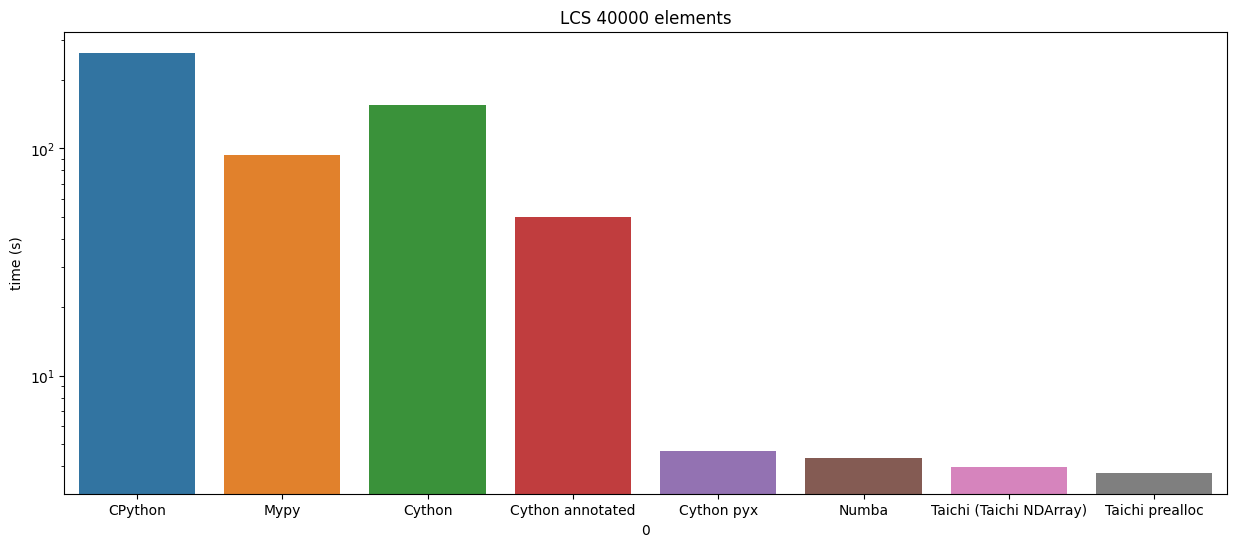

In [37]:
plt.figure(figsize=(15,6))
plt.yscale("log")
ax = sns.barplot(x=res[0], y=res[2])
ax.set(ylabel="time (s)", title="LCS 40000 elements")
plt.show()

In [38]:
y = 1./res[2]

In [43]:
speedup = y/y[0]

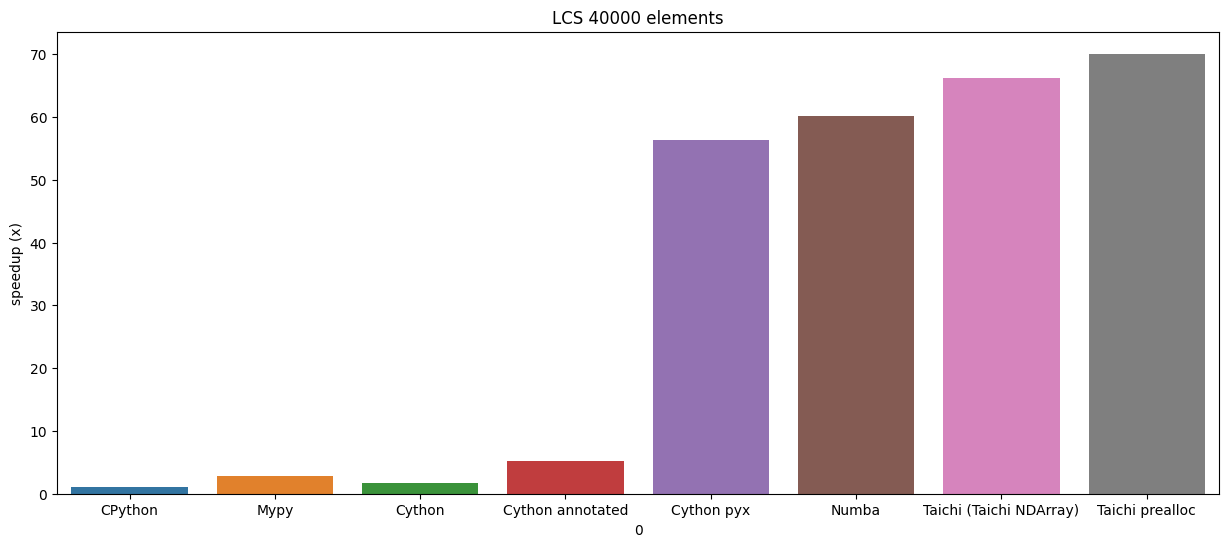

In [45]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=res[0], y=speedup)
ax.set(ylabel="speedup (x)", title="LCS 40000 elements")
plt.show()